In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [23]:
data_01 = pd.read_csv(f'Classified Data', index_col = 0)
data_v1 = data_01.copy()

In [25]:
data_v1.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [27]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [29]:
data_v1.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [31]:
data_v1.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [15]:
data_v1.shape

(1000, 12)

In [35]:
scaler = StandardScaler()
scaler.fit(data_v1.drop(columns = ['TARGET CLASS'], axis = 1))
scaled_features = scaler.transform(data_v1.drop(columns = ['TARGET CLASS'], axis = 1))

In [37]:
data_02 = pd.DataFrame(
    scaled_features,
    columns = data_v1.columns[:-1]
)

data_v2 = data_02.copy()

In [39]:
data_v2.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [41]:
X = data_v2
y = data_v1['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [47]:
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
pred = KNN.predict(X_test)

In [53]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



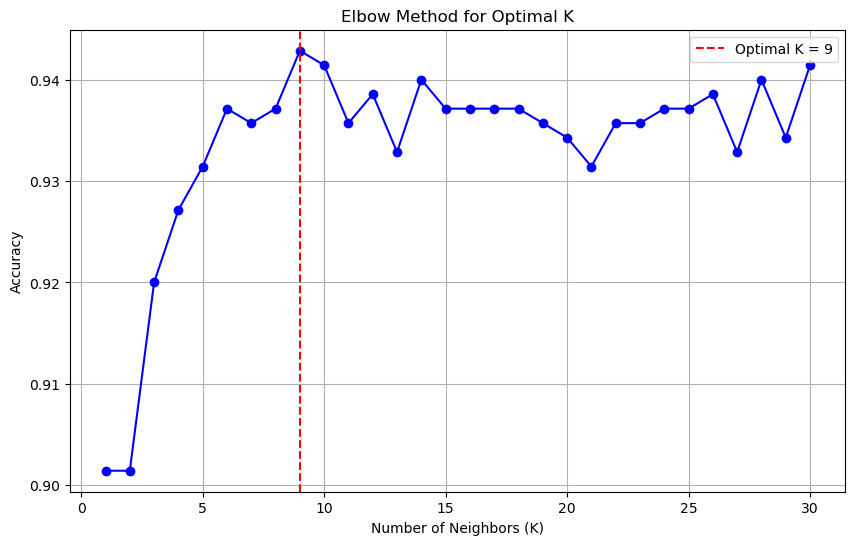

The optimal value of K is: 9


In [59]:
# Step 2: Define a range of K values to test
k_values = range(1, 31)  # Test K from 1 to 30

# Step 3: Evaluate model performance for each K
accuracy_scores = []  # To store accuracy scores for each K

for k in k_values:
    # Create a KNN classifier with the current K value
    kNN = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation and calculate mean accuracy
    scores = cross_val_score(kNN, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    accuracy_scores.append(scores.mean())  # Average accuracy across folds

# Step 4: Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)

# Highlight the elbow point (optional)
optimal_k = k_values[np.argmax(accuracy_scores)]  # Find K with the highest accuracy
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend()

plt.show()

# Step 5: Print the optimal K value
print(f"The optimal value of K is: {optimal_k}")

In [61]:
KNN = KNeighborsClassifier(n_neighbors = 9)
KNN.fit(X_train, y_train)

pred = KNN.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[152   7]
 [  8 133]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       159
           1       0.95      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

